In [1]:
import gempy as gp
import numpy as np
%matplotlib inline

## Geological Model with just a Fault

In [2]:
# Create a model instance
geo_model = gp.create_model('no_dyke')

# Initialize the model, set dimension and load interface and orientation data
gp.init_data(geo_model, [0., 1200., 0., 2., 0., 1500.], [100, 2, 100],
            path_i = '../data/06_Dyke_Model_wo_Dyke_interfaces.csv',
            path_o = '../data/06_Dyke_Model_wo_Dyke_orientations.csv');

Active grids: ['regular']


C:\Users\brigg\miniconda3\envs\env_gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


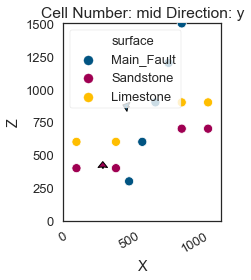

In [3]:
gp.plot_2d(geo_model, show_legend=False)

In [4]:
# Set the interpolator function
# Create the theano model
gp.set_interpolator(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[]);

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            1920.94
$C_o$            87857.2
drift equations   [3, 3]


In [5]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Main_Fault,Default series,1,#015482,1
1,Sandstone,Default series,2,#9f0052,2
2,Limestone,Default series,3,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [6]:
# Assign formations to series
gp.map_series_to_surfaces(geo_model,
                         {"Fault_series":'Main_Fault',
                         "Sediment_series":('Limestone', 'Sandstone')},
                         remove_unused_series=True)
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Main_Fault,Fault_series,1,#015482,1
1,Sandstone,Sediment_series,1,#9f0052,2
2,Limestone,Sediment_series,2,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [7]:
# Set Faults
geo_model.set_is_fault(['Fault_series'],
                      change_color=False);

In [8]:
# Compute the model
sol = gp.compute_model(geo_model, compute_mesh=True)

C:\Users\brigg\miniconda3\envs\env_gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


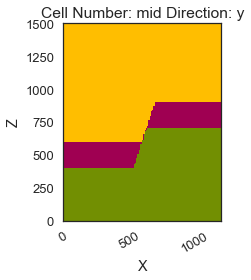

In [9]:
gp.plot_2d(geo_model, direction='y', show_block=True, show_boundaries=False, 
           show_data=False, show_results=True)

## Introducing a Dyke to try to act as a Fault body

In [85]:
# Create a model instance
model_dyke = gp.create_model('with_dyke')

# Initialize the model, set dimension and load interface and orientation data
gp.init_data(model_dyke, [0., 1200., 0., 2., 0., 1500.], [100, 2, 100],
            path_i = '../data/06_Dyke_Model_with_Dyke_interfaces.csv',
            path_o = '../data/06_Dyke_Model_with_Dyke_orientations.csv');

Active grids: ['regular']


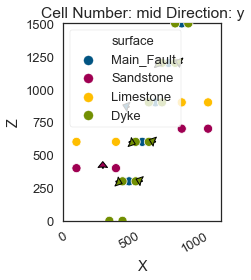

In [86]:
gp.plot_2d(model_dyke)

In [87]:
# Assign formations to series
gp.map_series_to_surfaces(model_dyke,
                         {"Fault_series": 'Main_Fault',
                          "Dyke_series": 'Dyke',
                         "Sediment_series": ('Limestone', 'Sandstone')},
                         remove_unused_series=True)
model_dyke.surfaces

,surface,series,order_surfaces,color,id
0,Main_Fault,Fault_series,1,#015482,1
3,Dyke,Dyke_series,1,#728f02,2
1,Sandstone,Sediment_series,1,#9f0052,3
2,Limestone,Sediment_series,2,#ffbe00,4
4,basement,Basement,1,#443988,5


In [88]:
# Set Faults
model_dyke.set_is_fault(['Fault_series'],
                      change_color=False);

In [89]:
model_dyke.faults.faults_relations_df

,Fault_series,Dyke_series,Sediment_series,Basement
Fault_series,False,True,True,True
Dyke_series,False,False,False,False
Sediment_series,False,False,False,False
Basement,False,False,False,False


In [90]:
fr = np.array([[False, False, True, True],
               [False, False, False, False],
               [False, False, False, False],
               [False, False, False, False]])
model_dyke.set_fault_relation(fr)

,Fault_series,Dyke_series,Sediment_series,Basement
Fault_series,False,False,True,True
Dyke_series,False,False,False,False
Sediment_series,False,False,False,False
Basement,False,False,False,False


In [91]:
model_dyke.series

,order_series,BottomRelation,isActive,isFault,isFinite
Fault_series,1,Fault,True,True,False
Dyke_series,2,Erosion,True,False,False
Sediment_series,3,Erosion,True,False,False
Basement,4,Erosion,False,False,False


In [92]:
# Set the interpolator function
# Create the theano model
gp.set_interpolator(model_dyke,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[]);

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                        values
range                 1920.94
$C_o$                 87857.2
drift equations  [3, 3, 3, 3]


In [93]:
# Compute the model
sol_dyke = gp.compute_model(model_dyke, compute_mesh=True)

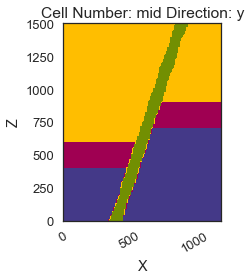

In [95]:
gp.plot_2d(model_dyke, direction='y', show_block=True, show_boundaries=False, 
           show_data=False, show_results=True)